In [1]:
pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

<h2> Carga de Datos </h2>

In [3]:
# Leer los datos de archivo csv, typed_uanl.csv con el URL
url =  "C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 2/Practica/RentasBicicletasSEUL.csv"
df = pd.read_csv(url)

In [4]:
# Resumen estadístico de los datos
summary_stats = df.describe()
# Verificación de valores nulos
missing_values = df.isnull().sum()

In [5]:
summary_stats, missing_values

(       Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
 count        8760.000000  8760.000000      8760.000000  8760.000000   
 mean          704.602055    11.500000        12.882922    58.226256   
 std           644.997468     6.922582        11.944825    20.362413   
 min             0.000000     0.000000       -17.800000     0.000000   
 25%           191.000000     5.750000         3.500000    42.000000   
 50%           504.500000    11.500000        13.700000    57.000000   
 75%          1065.250000    17.250000        22.500000    74.000000   
 max          3556.000000    23.000000        39.400000    98.000000   
 
        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
 count       8760.000000       8760.000000                8760.000000   
 mean           1.724909       1436.825799                   4.073813   
 std            1.036300        608.298712                  13.060369   
 min            0.000000         27.000000                

In [6]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Preprocesar los datos: convertir columnas categóricas a numéricas y manejar valores faltantes si los hay
df['Seasons'] = df['Seasons'].astype('category').cat.codes
df['Holiday'] = df['Holiday'].astype('category').cat.codes
df['Functioning Day'] = df['Functioning Day'].astype('category').cat.codes

In [10]:
# Selección de características y variable objetivo
features = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
    'Visibility (10m)', 'Dew point temperature(°C)', 
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 
    'Seasons', 'Holiday', 'Functioning Day'
]
X = df[features]
y = df['Rented Bike Count']

In [11]:
# Definir modelos con regularización o normalización donde aplique
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression()),
    'Ridge Regression': make_pipeline(StandardScaler(), Ridge()),
    'KNN Regression': make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5)),
    'Decision Tree Regression': DecisionTreeRegressor()
}

In [13]:
# Validación cruzada
results = {}
for name, model in models.items():
    r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    results[name] = r2

# Encontrar el mejor modelo
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]


In [14]:
# Entrenar el mejor modelo en todo el conjunto de datos
best_model.fit(X, y)

# Mostrar resultados
print("Resultados de la Validación Cruzada:")
for model_name, score in results.items():
    print(f"{model_name}: R^2 = {score:.4f}")

print(f"\nEl mejor modelo es: {best_model_name} con R^2 = {results[best_model_name]:.4f}")

Resultados de la Validación Cruzada:
Linear Regression: R^2 = -0.4594
Polynomial Regression (degree=2): R^2 = -258872063407996648030208.0000
Ridge Regression: R^2 = -0.4590
KNN Regression: R^2 = 0.2455
Decision Tree Regression: R^2 = 0.3144

El mejor modelo es: Decision Tree Regression con R^2 = 0.3144


<h2> Regresion </h2>

In [18]:
# Separar las características (features) de la variable objetivo (target)
# Filtrar los datos para días festivos
holiday_df = df[df['Holiday'] == 'Holiday']

# Separar las características (features) de la variable objetivo (target)
# Eliminar columnas que no se utilizarán
X = holiday_df.drop(['Rented Bike Count', 'Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
y = holiday_df['Rented Bike Count']

# Convertir características categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

In [19]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Utilizamos el modelo entrenado para hacer predicciones con los datos de prueba.
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

In [22]:
#Evaluar el Modelo
#Evaluamos el rendimiento del modelo calculando el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Squared Error: 159910.18325067527
R² Score: 0.548896884499194


<h2> Grafica </h2>

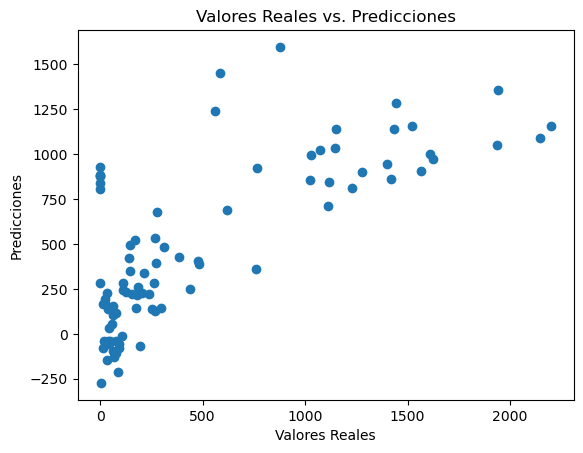

In [28]:
# Resultados con un gráfico de dispersión de los valores reales frente a las predicciones
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.savefig("C:/Users/PC/Documents/GitHub/GitFlow-en-Github/ML003/Practica 2/Practica/GraficaDispersionRealvsPred.png")
plt.show()
plt.close()

<h2> Analisis de resultados </h2>

 <t2>   Error Cuadrático Medio (MSE): Un MSE de 159910.18 indica que, en promedio, 
las predicciones del modelo tienen un error cuadrático bastante alto. Esto sugiere que las predicciones no son muy precisas.

Coeficiente de Determinación (R²): Un R² de 0.55 indica que el modelo explica aproximadamente el 55% de la variabilidad en el conteo de bicicletas rentadas en días festivos.
Este valor es aceptable pero muestra que hay margen para mejorar el modelo.   </t2>